## **Introduction**

For this lab I will determine which type of probability distribution best fits data by calculating the z-score, and then detect outliers. I will be using data from United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of the main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, I will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

In [51]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. 

In [52]:
# Import data.

data = pd.read_csv("modified_c4_epa_air_quality.csv")


## **Data exploration** 

In [53]:
# Display first 10 rows of the data.

data.head(10)



date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   
5  2018-01-01        Hawaii      Honolulu  Not in a city   
6  2018-01-01        Hawaii      Honolulu  Not in a city   
7  2018-01-01  Pennsylvania          Erie           Erie   
8  2018-01-01        Hawaii      Honolulu       Honolulu   
9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   
5                                            Kapolei  Carbon monoxide   
6                                            Kapolei  Carbon monoxide   
7                                                NaN  Carbon monoxide   
8                                           Honolulu  Carbon monoxide   
9                      Fort Collins - CSU - S. Mason  Carbon monoxide   

    units_of_measure   aqi_log  
0  Parts per million  2.079442  
1  Parts per million  1.791759  
2  Parts per million  1.098612  
3  Parts per million  1.386294  
4  Parts per million  1.386294  
5  Parts per million  2.708050  
6  Parts per million  1.098612  
7  Parts per million  1.098612  
8  Parts per million  1.791759  
9  Parts per million  1.945910

In [54]:
# Display number of rows and number of columns.

data.shape



(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

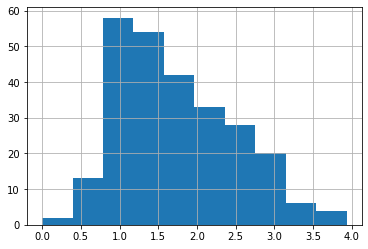

In [55]:
# Create a histogram to visualize distribution of aqi_log using matplotlib hist().

data['aqi_log'].hist()



The histogram appears to be comparable to a normal distribution, but there is a slight right skew. It might still be close enough to be considered a normal distribution, which I will find out.

First, I will define two variables to store the mean and standard deviation for `aqi_log`. These will be useful in calculating the upper and lower limits to apply the empirical rule. 

In [56]:
# Define variable for aqi_log mean.

aqi_log_mean = data['aqi_log'].mean()


# Print out the mean.

aqi_log_mean



1.7669210929985577

The mean of the aqi log is approximately 1.766

In [57]:
# Define variable for aqi_log standard deviation.

aqi_log_std = data['aqi_log'].std()



# Print out the standard deviation.

aqi_log_std



0.7147155520223721

The standard deviation is approximately 0.71.

In [58]:
# Define variable for lower limit, 1 standard deviation below the mean.

lower_limit = aqi_log_mean - 1 * aqi_log_std

# Define variable for upper limit, 1 standard deviation above the mean.

upper_limit = aqi_log_mean + 1 * aqi_log_std


# Display lower_limit, upper_limit.

print(lower_limit)
print(upper_limit)


1.0522055409761855
2.48163664502093


Upper limit, or +1 STD from the mean, is about 2.48. The lower limit, or -1 STD from the mean, is about 1.05.

In [59]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data["aqi_log"]<=upper_limit) & (data["aqi_log"]>=lower_limit)).mean() * 100


76.15384615384615

I found that 76.1% of data falls within 1 STD of the mean. Using the empirical rule, I would expect 68% to fall within 1 STD of the mean. This is around 11.9% error.

Now I will find what percent falls within 2 and 3 STD of the mean.

In [60]:
# Define variable for lower limit, 2 standard deviation below the mean.

lower_limit_2 = aqi_log_mean - 2 * aqi_log_std

# Define variable for upper limit, 2 standard deviation above the mean.

upper_limit_2 = aqi_log_mean + 2 * aqi_log_std


# Display lower_limit, upper_limit.

print(lower_limit_2)
print(upper_limit_2)


0.33748998895381344
3.1963521970433018


In [61]:
# Display the actual percentage of data that falls within 2 standard deviation of the mean.

((data["aqi_log"]<=upper_limit_2) & (data["aqi_log"]>=lower_limit_2)).mean() * 100


95.76923076923077

For a normal distribution I would expect about 95% of data to fall within 2 STD of the mean, so this one is fairly accurate.

In [62]:
# Define variable for lower limit, 3 standard deviation below the mean.

lower_limit_3 = aqi_log_mean - 3 * aqi_log_std

# Define variable for upper limit, 3 standard deviation above the mean.

upper_limit_3 = aqi_log_mean + 3 * aqi_log_std


# Display lower_limit, upper_limit.

print(lower_limit_3)
print(upper_limit_3)


-0.3772255630685586
3.911067749065674


In [63]:
# Display the actual percentage of data that falls within 2 standard deviation of the mean.

((data["aqi_log"]<=upper_limit_3) & (data["aqi_log"]>=lower_limit_3)).mean() * 100


99.61538461538461

I expected 99.7% of data to fall within 3 STD of the mean, which is very close to the 99.62% found. Overall, this data can be represented relatively will using a normal distribution.

Now, I want to find outliers. I will do this by computing the z-score for every `aqi_log` value and adding a column named `z_score` in the data to store those results. 

In [64]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)




# Display the first 5 rows to ensure that the new column was added.

data.head(5)


date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure   aqi_log   z_score  
0  Parts per million  2.079442  0.437265  
1  Parts per million  1.791759  0.034753  
2  Parts per million  1.098612 -0.935070  
3  Parts per million  1.386294 -0.532557  
4  Parts per million  1.386294 -0.532557

Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [67]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean using a mask

data[(data['z_score'] > 3) | (data['z_score'] < -3)]


date_local state_name county_name city_name local_site_name  \
244  2018-01-01    Arizona    Maricopa   Phoenix    WEST PHOENIX   

      parameter_name   units_of_measure   aqi_log   z_score  
244  Carbon monoxide  Parts per million  3.931826  3.029044

We see that the only outlier that is outside of +- 3 STD of the mean for aqi_log is row 244, or the West Pheonix location. They have an aqi_log of 3.93.

Overall, I found:
- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- The EPA should consider allocating more resources toward further examining this site in order to improve its air quality.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 